In [16]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=load_breast_cancer()

In [9]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)

In [13]:
df['Target']=data.target

In [47]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: >

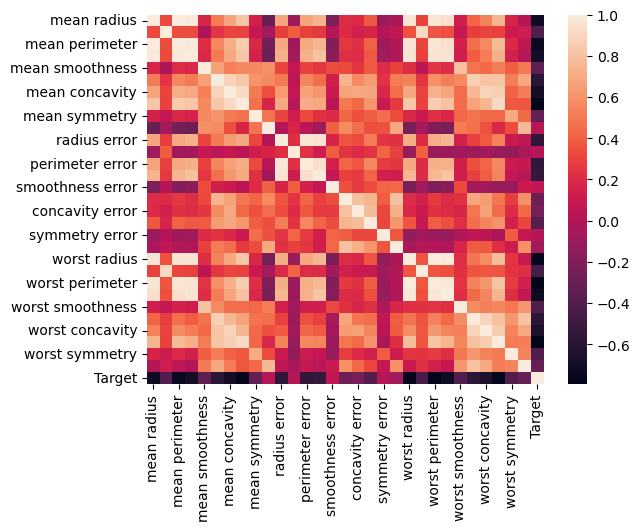

In [17]:
sns.heatmap(df.corr())

In [18]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

<Axes: xlabel='Target', ylabel='Count'>

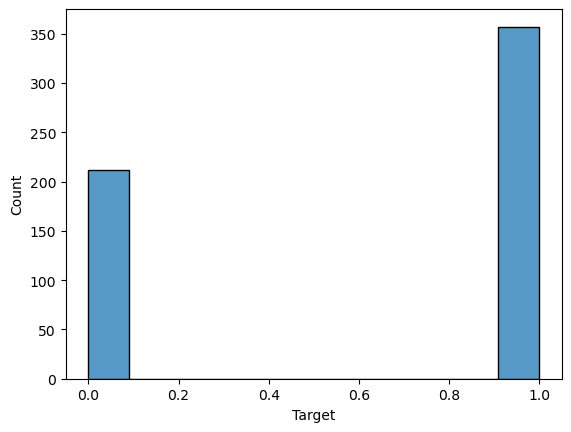

In [40]:
sns.histplot(df['Target'])

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [46]:
Scaler=MinMaxScaler()

In [45]:
X=df.drop('Target',axis=1)
y=df['Target']

In [49]:
X=Scaler.fit_transform(X)

In [51]:
X=pd.DataFrame(data=X,columns=data.feature_names)

In [52]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


pandas.core.series.Series

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
knn_model=KNeighborsClassifier(n_neighbors=5)

In [56]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
y_pred=knn_model.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(e

In [66]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [62]:
score=accuracy_score(y_test,y_pred)

In [63]:
score

0.9649122807017544

In [64]:
roc=roc_auc_score(y_test,y_pred)

In [65]:
roc

0.9626596790042582

In [68]:
conf_matrix=confusion_matrix(y_test,y_pred)

In [70]:
conf_matrix #BURADA DEMEK İSTEDİĞİ 0 OLANLARIN 41 ADEDİNİ 1 OLANLARIN 69 ADEDİNİ DOĞRU TAHMİN ETTİM

array([[41,  2],
       [ 2, 69]], dtype=int64)

In [128]:
max_item=[]
def parametre(X_train,X_test,y_train,y_test,x):
    for i in range(1,x+2):
        knn_model=KNeighborsClassifier(n_neighbors=i)
        knn_model.fit(X_train,y_train)
        predict=knn_model.predict(X_test)
        accuracy=accuracy_score(y_test,predict)
        print(f'komsu sayısı {i} doğruluk oranı {accuracy}')
        max_item.append(accuracy)



In [129]:
parametre(X_train,X_test,y_train,y_test,25)

komsu sayısı 1 doğruluk oranı 0.956140350877193
komsu sayısı 2 doğruluk oranı 0.9385964912280702
komsu sayısı 3 doğruluk oranı 0.9649122807017544
komsu sayısı 4 doğruluk oranı 0.9649122807017544
komsu sayısı 5 doğruluk oranı 0.9649122807017544
komsu sayısı 6 doğruluk oranı 0.956140350877193
komsu sayısı 7 doğruluk oranı 0.9649122807017544
komsu sayısı 8 doğruluk oranı 0.9649122807017544
komsu sayısı 9 doğruluk oranı 0.9649122807017544
komsu sayısı 10 doğruluk oranı 0.9649122807017544
komsu sayısı 11 doğruluk oranı 0.956140350877193
komsu sayısı 12 doğruluk oranı 0.9649122807017544
komsu sayısı 13 doğruluk oranı 0.9649122807017544
komsu sayısı 14 doğruluk oranı 0.9649122807017544
komsu sayısı 15 doğruluk oranı 0.956140350877193
komsu sayısı 16 doğruluk oranı 0.956140350877193
komsu sayısı 17 doğruluk oranı 0.9649122807017544
komsu sayısı 18 doğruluk oranı 0.956140350877193
komsu sayısı 19 doğruluk oranı 0.956140350877193
komsu sayısı 20 doğruluk oranı 0.956140350877193
komsu sayısı 21 d

In [130]:
print(f'Max doğruluk oranı {max(max_item)} komsu sayısı {max_item.index(max(max_item))+1}')

Max doğruluk oranı 0.9649122807017544 komsu sayısı 3
